In [1]:
# Excution Time Setup...
!pip install ipython-autotime
%load_ext autotime 

time: 1.74 ms (started: 2021-06-14 08:36:30 +00:00)


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step
time: 1.87 s (started: 2021-06-14 08:36:30 +00:00)


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
time: 2.53 ms (started: 2021-06-14 08:36:32 +00:00)


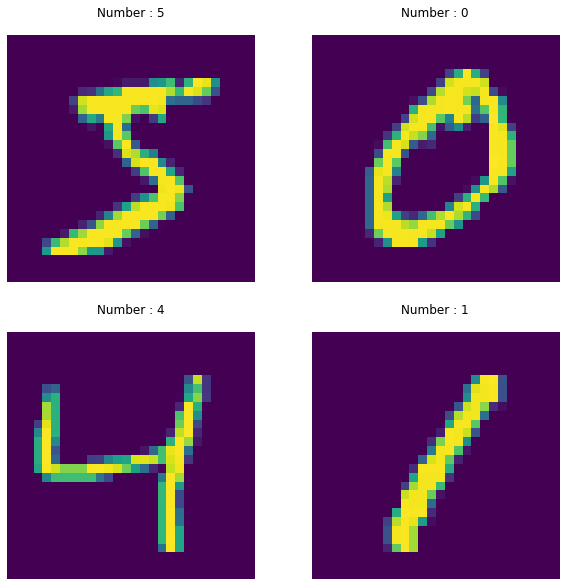

time: 319 ms (started: 2021-06-14 08:36:32 +00:00)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(2,2, figsize=(10,10))

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis("off")
  ax.set_title('Number : {}'.format(y_train[i]))
fig.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 225
x_test /= 255


time: 94.9 ms (started: 2021-06-14 08:36:32 +00:00)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape = (28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(14,kernel_size=(3,3), input_shape = (14,14,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = tf.nn.sigmoid))
model.add(Dropout(0.3))
model.add(Dense(50,activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation = tf.nn.softmax))


time: 226 ms (started: 2021-06-14 08:36:33 +00:00)


In [7]:
 model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

time: 10.8 ms (started: 2021-06-14 08:36:33 +00:00)


In [8]:
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3432 - accuracy: 0.8955
Epoch 2/2
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1091 - accuracy: 0.9684


time: 58.4 s (started: 2021-06-14 08:36:33 +00:00)


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.9809


[0.05801495909690857, 0.98089998960495]

time: 1.92 s (started: 2021-06-14 08:37:31 +00:00)


In [11]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets
time: 1.05 s (started: 2021-06-14 08:41:14 +00:00)
